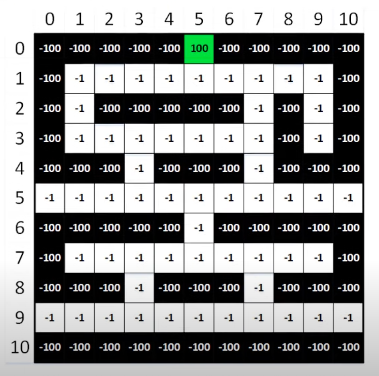

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='Q-Learning.png') 

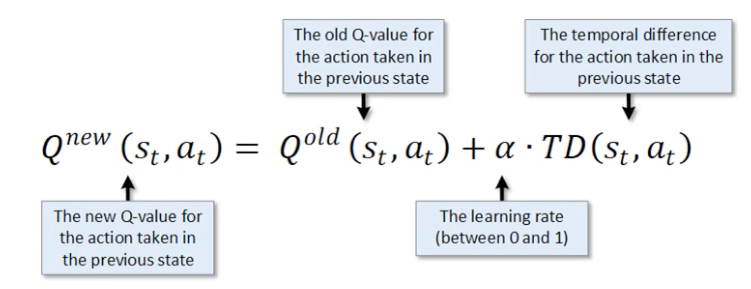

In [37]:
Image(filename='Bellman_Equation.png')

In [38]:
environment_rows = 11
environment_columns = 11

# 10x10, up, right, down, left
q_values = np.zeros((environment_rows, environment_columns, 4))

In [39]:
#q_values
actions = ['up', 'right', 'down', 'left'] # 0,1,2,3

In [40]:
rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 5] = 100 # set reward for packaging area

aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

# set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1.
        
for row in rewards:
    print(row)

[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


In [41]:
def is_terminal_state(current_row_index, current_column_index):
    # if not terminal state:
    if rewards[current_row_index, current_column_index] == -1:
        return False
    else:
        return True

def get_starting_location():
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
    # choose until chosen state is white square
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(environment_rows)
        current_column_index = np.random.randint(environment_columns)
    return current_row_index, current_column_index

# epsilon greedy algorithm that will choose which action
def get_next_action(current_row_index, current_column_index, epsilon):
    # if randomly chosen value between 0 and 1 < epsilon choose best from Q-table
    if np.random.random() < epsilon: # (0.9)
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(4) # 10%

def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

# shortest path between any location and item
def get_shortest_path(start_row_index, start_column_index):
    if is_terminal_state(start_row_index, start_column_index):
        return[]
    else:
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
        # continue moving along path until goal
        while not is_terminal_state(current_row_index, current_column_index):
            # get best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
            # move to next location and add to list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            shortest_path.append([current_row_index, current_column_index])
        return shortest_path
  

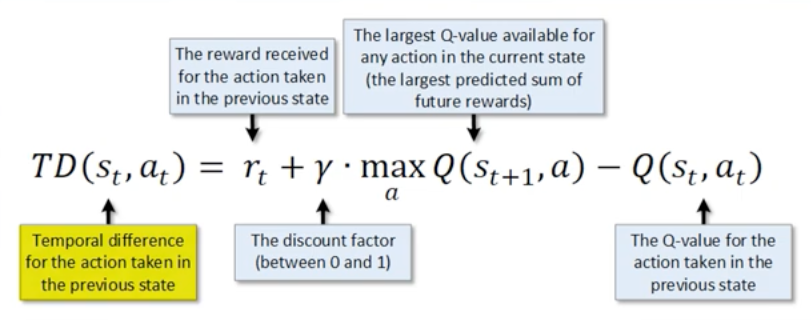

In [42]:
Image(filename='temporal_differences.png')

In [43]:
# Train the ai using q-learning
epsilon = 0.9 # % of time we choose best action
discount_factor = 0.9 # for future rewards
learning_rate = 0.9

for episode in range(1000):
    row_index, column_index = get_starting_location()
    
    # take actions until reach terminal state
    while not is_terminal_state(row_index, column_index):
        action_index = get_next_action(row_index, column_index, epsilon)
        # perform the action and move to the next state
        old_row_index, old_column_index, = row_index, column_index
        row_index, column_index = get_next_location(row_index, column_index, action_index)
        # receive the reward for moving to state and calculate temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value
        # update q_value for previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value
#         first = 1
#         second = 5
#         if old_row_index == first and old_column_index == second:
#             print(first, second, row_index, column_index)
#             print(q_values[first][second-1], q_values[first][second], q_values[first][second+1])
#             print("R:", reward,
#                   "D:", discount_factor,
#                   "MaxSumFtr:", np.max(q_values[row_index, column_index]),
#                   "Prev Q:", old_q_value,
#                   "temporal_difference:", temporal_difference,
#                   "new_q_value", new_q_value)
        
    
    #print("Training Complete!")                                                                                                                                       

[ 100.           79.09999999 -100.           79.1       ]


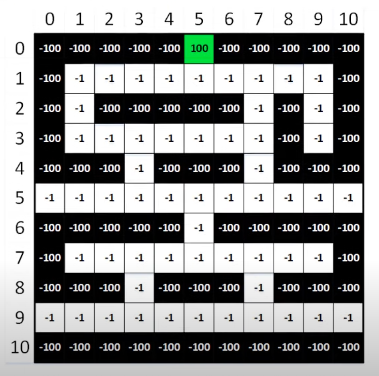

In [44]:
print(q_values[1][5])
display(Image(filename='Q-Learning.png'))

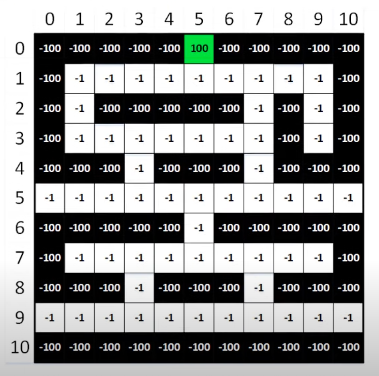

Up, Right, Down, Left - decision matrix


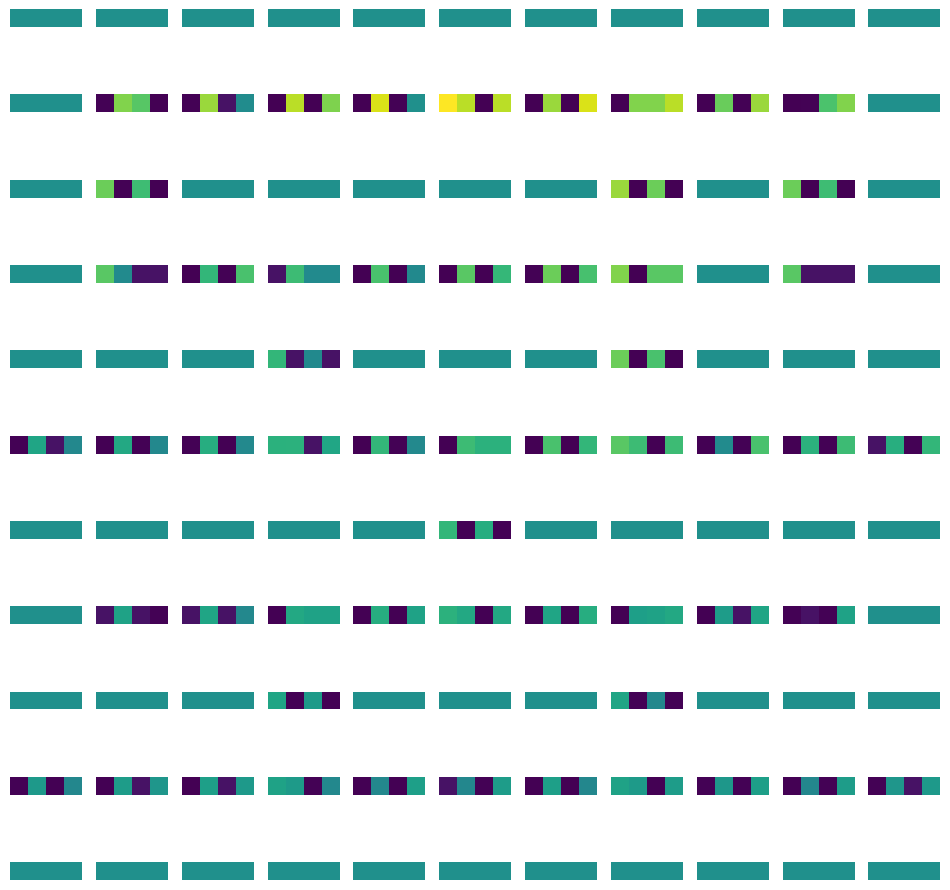

In [45]:
# visualize Q-values
def visualize_q_values(q_values):
    num_rows, num_columns, num_actions = q_values.shape

    # Create a figure and axis
    fig, ax = plt.subplots(num_rows, num_columns, figsize=(12, 12))

    # Loop through each state and plot Q-values as a heatmap
    for i in range(num_rows):
        for j in range(num_columns):
            q_values_state = q_values[i, j, :]
            ax[i, j].imshow(q_values_state.reshape((1, num_actions)), cmap='viridis', vmin=np.min(q_values), vmax=np.max(q_values))
            ax[i, j].axis('off')

            # Add Q-values as text on each cell
#             for a, q_value in enumerate(q_values_state):
#                 ax[i, j].text(a, 0, f'{q_value:.2f}', color='white', ha='center', va='center')

    plt.show()
    
display(Image(filename='Q-Learning.png'))
print("Up, Right, Down, Left - decision matrix")
visualize_q_values(q_values)



In [46]:
print(get_shortest_path(9, 6))

[[9, 6], [9, 7], [8, 7], [7, 7], [7, 6], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5], [0, 5]]
